<a href="https://colab.research.google.com/github/joaquinhojman/Simulacion-TP1/blob/main/Simulacion_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
from scipy.stats import chi2
import collections
from numpy.random import randn
from scipy.stats import kstest,uniform, expon, norm

#EJERCICIO 1

1)a) Implementar un Generador Congruencial Lineal (GCL) de módulo 2
32, multiplicador 1013904223, incremento de
1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

In [ ]:
#Definición de variables globales
m = 2**32
a = 1013904223
c = 1664525
x0 = (102264 + 102425 + 104112)//3

In [ ]:
def gcl(n, a = a, x0 = x0, c = c, m = m): #n = cantidad de iteraciones
	valores = []
	x_act = x0
	for i in range(n):
		x_sig = (a * x_act + c) % m
		valores.append(x_sig)
		x_act = x_sig
	return valores

b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1


In [ ]:
def gclB(n, a = a, x0 = x0, c = c, m = m): #n = cantidad de iteraciones
	valores_normalizados = gcl(n,a=a,x0=x0,c=c,m=m)
	for i in range(len(valores_normalizados)):
		valores_normalizados[i] = valores_normalizados[i]/m
	return valores_normalizados

c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

In [ ]:
n=1000
a_results = gcl(n)
b_results = gclB(n)


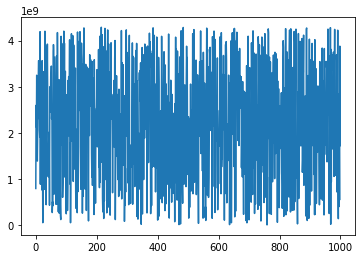

In [ ]:
plt.plot(a_results) #density plot
plt.show()

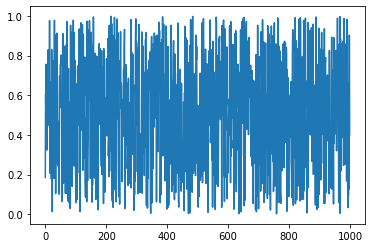

In [ ]:
plt.plot(b_results) #density plot
plt.show()

In [ ]:
nums = []
for i in range(n):
  nums.append(i)

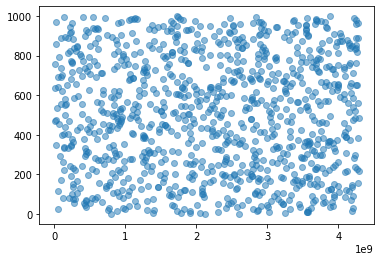

In [ ]:
plt.scatter(a_results,nums, alpha=0.5) #scatter plot
plt.show()	

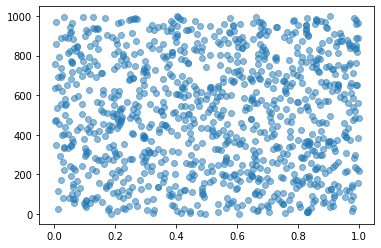

In [ ]:
plt.scatter(b_results,nums, alpha=0.5) #scatter plot
plt.show()

d) Basándose en el generador implementado en el ítem a,implemente el generador aditivo de Mitchell y Moore


In [ ]:
def gclD(n, a = a, x0 = x0, c = c, m = m): #n = cantidad de iteraciones
	valores = [] #Valores abritrarios
	for i in range(55):
		valores.append(random.randint(0, 2**24))
	for i in range(n-55):
		x_sig = (valores[i-24] + valores[i-55]) % 2**24
		valores.append(x_sig)
	return valores

#EJERCICIO 2


Para cada uno de los generadores del ejercicio 1, proponer, y realizar, al menos 2 tests para evaluar su comportamiento.
Evaluar e interpretar los resultados de cada uno para distintos tamaños de muestras

##A) Test de frecuencias


In [ ]:
#Se realiza un test de frecuencia.
def testFrecuencias(n,m,generador):
	pE = 1/m #prob de salir de cada numero
	fEsp = n*pE #frecuencia esperada de cada uno
	nros = collections.Counter(generador(n,m=m))
	dcuad = 0
	for i in range(m):
		dcuad += ((nros[i]-fEsp)**2)
	dcuad = dcuad/fEsp
	limiteSuperior = chi2.ppf(0.99, df=m-1)
	if (dcuad <= limiteSuperior):
		print("El test acepta la hipotesis nula")
	else:
		print("El test rechaza la hipotesis nula")


Resultados obtenidos:

In [ ]:
#para GCL del punto A:
	#testFrecuencias(100,2**32,gcl)
	#con 1000 y 0.95 acepta
	#con 1000 y 0.99 acepta
	#con 10000 y 0.99 acepta
	#con 100000 y 0.99 acepta
	#con 100 y 0.99 acepta

	#para GCL del punto B
	#testFrecuencias(1000,2**32,gclB)
	#con 1000 y 0.95 acepta
	#con 1000 y 0.99 acepta
	#con 10000 y 0.99 acepta
	#con 100000 y 0.99 acepta
	#con 100 y 0.99 acepta

	#para GCL del punto D
	#testFrecuencias(100000,2**24,gclD)
	#con 1000 y 0.95 rechaza
	#con 1000 y 0.99 rechaza
	#con 10000 y 0.99 rechaza
	#con 100000 y 0.99 acepta

##B) Gap Test

In [ ]:
from scipy.stats import chi2

def gapTest(nGaps,alpha,beta):
	i = 0
	gap = 0
	gaps = np.zeros(nGaps)
	number = gcl(1)[0]
	while i < nGaps:
		if((number > alpha) and (number <= beta)):
			gap += 1
		else:
			np.append(gaps, gap + 1)
			gaps[i] = gap + 1
			i += 1
			gap = 0
		number_gcl = gcl(1, x0 = number)[0]
		number = gcl(1, x0 = number_gcl)[0]

	p = (beta - alpha)
	expected = np.zeros(nGaps)
	for j in range(len(gaps)):
		num = gaps[j]
		expected[j] = p*((1-p)**(num-1))*(nGaps)
	[h,pValor] = stats.chisquare(gaps, expected)
	return pValor

def main():
	#Se toma alpha = 0.3, beta = 0.6.
	pValor = gapTest(13, 0.3, 0.6)
	nivelDeSignifiacion = 0.01
	if pValor < nivelDeSignifiacion:
	    print("El test rechaza la hipotesis nula")
	else:
	    print("El test acepta la hipotesis nula")

main()


Resultados: (Y como probar el codigo :) )

In [ ]:

'''RESULTADOS OBSERVADOS: alpha = 0.3, beta = 0.6. n de sign = 0.01

Para el generador A: (multiplicar alpha y beta por m. Dividir p por m (linea 25))
nGaps = 12 o menor: acepta
nGaps = 13 o mayor: rechaza

Para el generador B: (la linea 22 multiplicarla por m = 2**32)
nGaps = 10 o menor: acepta
nGaps = 11 o mayor: rechaza

Para el generador D: (multiplicar alpha y beta por m=2**24. Dividir p por m (linea 25))
nGaps = 13 o menor: acepta
nGaps = 14 o mayor: rechaza

'''

#EJERCICIO 3

Se desea generar puntos al azar con distribución uniforme dentro del área descripta en el gráfico utilizando los siguientes generadores de números al azar:


A) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido


In [ ]:
def randomCircle():
	while True:
		x = random.randint(5, 15)
		y = random.randint(5, 15)
		h = (((x-10)**2) + ((y-10)**2))**0.5
		if (h <= 5): #Acepta los valores generados
			return x,y

B) Alguno de los generadores de números al azar implementados con el algoritmo del ejercicio 1.

In [ ]:
def gclCircle():
	while True:
		x0 = random.randint(5, 15)
		y0 = random.randint(5, 15)
		x = gclB(1,x0=x0)[0] * 15
		y = gclB(1,x0=y0)[0] * 15
		h = (((x-10)**2) + ((y-10)**2))**0.5
		if (h <= 5): #Acepta los valores generados
			return x,y

C) Calcule el factor de rendimiento del método.


In [ ]:
'''Los metodos estan diseñados para que siempre devuelvan un numero valido (por el while)
Sin embargo, si les sacamos el while y hacemos n iteraciones, podemos ver cuantos son validos
sobre el total calculado'''

'''Para el generador random del item A, basado en 100.000 iteraciones, el factor de rendimiento es del
67% aproximadamente '''

'''Para el generador del item B, basado en 100.000 iteraciones, el factor de rendimiento es del
32% aproximadamente '''

#EJERCICIO 6

En el trabajo práctico se incluye un archivo con números pseudoaleatorios.
Determine, y justifique,a cuál de las siguientes distribuciones pertenecen los números suministrados:

In [ ]:
# Kolmogorov Smirnov Test

numeros = []
f = open('random_numbers.txt', "r")
for linea in f:
	numeros.append(float(linea.rstrip('\n')))
f.close()
umbral = 0.01

#Test de Uniforme
print("Prueba de datos uniformes")
resultado = kstest(numeros,uniform(25,35).cdf)
if (resultado.pvalue < umbral):
	print("Los datos no son uniformes")
else:
	print("Los datos son uniformes")
print("")

#Test de exponencial
print("Prueba de datos exponenciales")
resultado = kstest(numeros,expon(1/30).cdf)
if (resultado.pvalue < umbral):
	print("Los datos no son exponenciales")
else:
	print("Los datos son exponenciales")
print("")

#Test de normalidad
print("Prueba de datos normales")
resultado = kstest(numeros,norm(30,5).cdf)
if (resultado.pvalue < umbral):
	print("Los datos no son normales")
else:
	print("Los datos son normales")
print(resultado)
print("")

Prueba de datos uniformes
Los datos no son uniformes

Prueba de datos exponenciales
Los datos no son exponenciales

Prueba de datos normales
Los datos son normales
KstestResult(statistic=0.0034093457053632203, pvalue=0.19543711620943577)



#RANDOM WALKING

#EJERCICIO 7

Se propone simular la evolución de una epidemia utilizando un modelo basado en agentes, en el cual el desplazamiento se
modela como random walking.
Se considera una población de N individuos (utilizar distintos valor de N) distribuidos uniformemente sobre un área de 100
m x 100 m
(Representar esta área como una grilla de celdas de 0,5 x 0,5 m)
Se considera que inicialmente el 2% de los individuos tiene la enfermedad, y existen 3 tipos e individuo

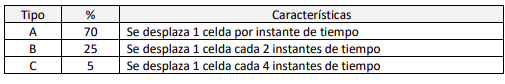

Esta enfermedad puede ser transmitida con una la siguiente probabilidad:

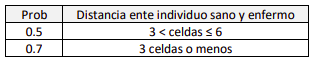

Suponer que las personas contagiadas no se pueden curar.
Realice una simulación hasta 5000 instantes de tiempo, o hasta que la población completa se contagie.

##DETALLES:


N: cantidad de individuos en la población.
El area mide 100 m x 100 m, y cada persona "ocupa" 0.5 m x 0.5 m
---> El espacio tiene 200 celdas de largo y 200 de ancho. (40 000 celdas)

Inicialmente el 2% de los N individuos esta infectado.
Hay tres tipos de individuos:
	-A: (70%) se desplaza 1 celda en 1 instante de t.
	-B: (25%) se desplaza 1 celda en 2 instantes de t.
	-C: (5%) se desplaza 1 celda en 4 instantes de t.

La probabilidad de transmitir la enfermedad es:
	-0.5 cuando la dist es entre 6 o menos celdas y mas de 3
	-0.7 cuando la dist es entre 3 o menos celdas

Supongo que los individuos unicamente se mueven hacia los costados o arriba y abajo. No en diagonal.
Se modelan los espacios en blanco como _, los espacios con infectados como X, y los sanos como O.
#

In [88]:
#CAMBIAR ESTOS VALORES PARA OBTENER DIFERENTES SIMULACIONES
n = 100 #cantidad de individuos en la poblacion
NCELDASXFILA = 100
INSTANTES = 5000


In [61]:
def generar_espacio_vacio():
	espacio = []
	for i in range(NCELDASXFILA):
		fila = []
		for j in range(NCELDASXFILA):
			fila.append("_")
		espacio.append(fila)
	return espacio

In [62]:
def obtener_estado(personas):
	espacio = generar_espacio_vacio()
	for v in personas.values():
		espacio[v[0]][v[1]] = v[2]
	return espacio

In [63]:
def imprimir_estado(personas):
	print(obtener_estado(personas))
	print("")

In [64]:
def hay_movimiento(tipo):
	if (tipo == "A"):
		return True
	probMovimiento = random.random()
	if (tipo == "B" and probMovimiento <= 0.5):
		return True
	if (tipo == "C" and probMovimiento <= 0.25):
		return True
	return False

In [65]:
def verificar_rango(i,j,dist):
	if (i + dist < 0 or i + dist >= NCELDASXFILA):
		return False
	if (j + dist < 0 or j + dist >= NCELDASXFILA):
		return False
	return True

In [66]:
def verificar_si_se_infecta(espacio,i,j):
	for dist in range(-3,3):
		if (verificar_rango(i,j,dist) == False):
			continue
		if (espacio[i][j+dist] == "X" or espacio[i+dist][j] == "X"):
			probContagio = random.random()
			if (probContagio <= 0.7):
				return True

	for dist in range(-6,-4):
		if (verificar_rango(i,j,dist) == False):
			continue
		if (espacio[i][j+dist] == "X" or espacio[i+dist][j] == "X"):
			probContagio = random.random()
			if (probContagio <= 0.5):
				return True

	for dist in range(4,6):
		if (verificar_rango(i,j,dist) == False):
			continue
		if (espacio[i][j+dist] == "X" or espacio[i+dist][j] == "X"):
			probContagio = random.random()
			if (probContagio <= 0.5):
				return True
	return False


In [67]:
def random_walking(personas, contagiados):
	sanos = n - contagiados
	lista_contagios_por_t = []
	lista_sanos_por_t = []
	lista_contagios_por_t.append(contagiados)
	lista_sanos_por_t.append(n-contagiados)
	for instante in range(INSTANTES):
		for k,v in personas.items():
			if (hay_movimiento(v[3]) == False):
				continue
			estado = obtener_estado(personas)
			movimiento = random.random()
			if (movimiento <= 0.25): #sentido del movimiento
				if (v[1]+1 == NCELDASXFILA): #que no se salga de rango
					continue
				if estado[v[0]][v[1]+1] == '_':#que no este ocupada
					personas[k] = (v[0],v[1]+1,v[2],v[3])
				
			elif (movimiento <= 0.5): #sentido del movimiento
				if (v[1]-1 < 0): #que no se salga de rango
					continue
				if estado[v[0]][v[1]-1] == '_':#que no este ocupada
					personas[k] = (v[0],v[1]-1,v[2],v[3])

			elif (movimiento <= 0.75): #sentido del movimiento
				if (v[0]+1 == NCELDASXFILA): #que no se salga de rango
					continue
				if estado[v[0]+1][v[1]] == '_':#que no este ocupada
					personas[k] = (v[0]+1,v[1],v[2],v[3])

			else: #sentido del movimiento
				if (v[0]-1 < 0): #que no se salga de rango
					continue
				if estado[v[0]-1][v[1]] == '_':#que no este ocupada
					personas[k] = (v[0]-1,v[1],v[2],v[3])


		for i in range(NCELDASXFILA):
			for j in range(NCELDASXFILA):
				if (estado[i][j] == "O" and verificar_si_se_infecta(estado,i,j) == True):
					estado[i][j] = "X"
					contagiados += 1
					sanos -= 1
					for k,v in personas.items():
						if (v[0] == i and v[1] == j):
							personas[k] = (i,j,"X",v[3])
							break

		lista_contagios_por_t.append(contagiados)
		lista_sanos_por_t.append(sanos)
		#imprimir_estado(personas)
		if (contagiados >= n):	
			return lista_contagios_por_t,lista_sanos_por_t				
	return lista_contagios_por_t,lista_sanos_por_t				


In [68]:
def estado_inicial():	
	#Ubico a las N personas de forma aleatoria. El 2% estan infectados.
	#Se decide el "tipo" de persona
	personas = {} #clave: persona. valor: x,y,infectado o no, tipo de persona
	espacio = generar_espacio_vacio()
	contagiados = 0
	for i in range(n):
		x = random.randrange(0,NCELDASXFILA-1)
		y = random.randrange(0,NCELDASXFILA-1)
		while (espacio[x][y] != "_"):
			x = random.randrange(0,NCELDASXFILA-1)
			y = random.randrange(0,NCELDASXFILA-1)

		tipo = ""
		probTipo = random.random()
		if (probTipo <= 0.70):
			tipo = "A"
		elif (probTipo <= 0.95):
			tipo = "B"
		else:
			tipo = "C"

		probInfectado = random.random()
		if (probInfectado <= 0.02):
			personas[i] = (x,y,"X",tipo)
			espacio[x][y]= "X"
			contagiados += 1
		else:
			personas[i] = (x,y,"O",tipo)
			espacio[x][y] = "O"
	return personas, contagiados


N = 2000

In [69]:
personas, contagiados = estado_inicial()
if (contagiados != 0):
  lista_contagiados, lista_sanos = random_walking(personas,contagiados)


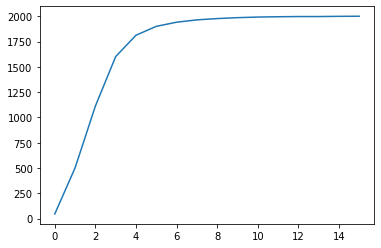

In [70]:
plt.plot(lista_contagiados);
plt.show()

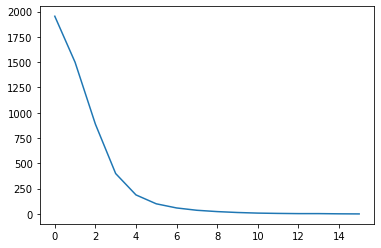

In [71]:

plt.plot(lista_sanos);
plt.show()

N = 1000

In [73]:
personas, contagiados = estado_inicial()
if (contagiados != 0):
  lista_contagiados, lista_sanos = random_walking(personas,contagiados)


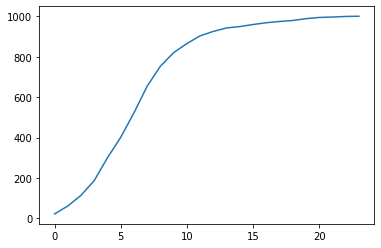

In [74]:
plt.plot(lista_contagiados);
plt.show()

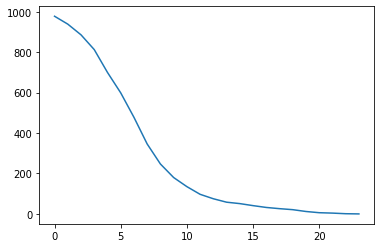

In [75]:
plt.plot(lista_sanos);
plt.show()

N = 500

In [77]:
personas, contagiados = estado_inicial()
if (contagiados != 0):
  lista_contagiados, lista_sanos = random_walking(personas,contagiados)


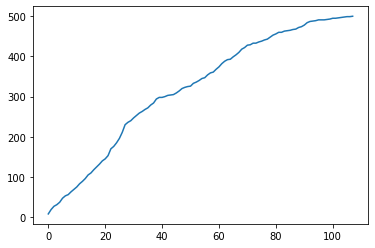

In [78]:
plt.plot(lista_contagiados);
plt.show()

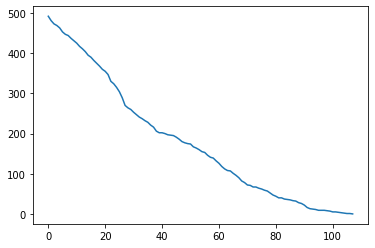

In [79]:
plt.plot(lista_sanos);
plt.show()

N = 250

In [81]:
personas, contagiados = estado_inicial()
if (contagiados != 0):
  lista_contagiados, lista_sanos = random_walking(personas,contagiados)


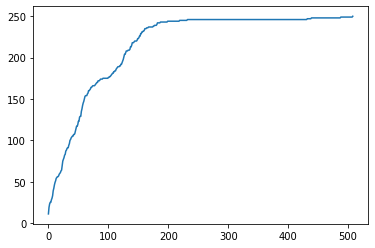

In [82]:
plt.plot(lista_contagiados);
plt.show()

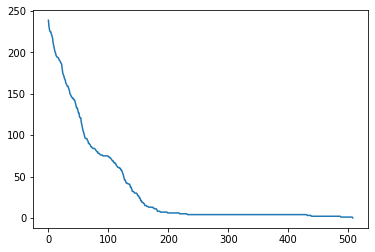

In [83]:
plt.plot(lista_sanos);
plt.show()

N = 100

In [89]:
personas, contagiados = estado_inicial()
if (contagiados != 0):
  lista_contagiados, lista_sanos = random_walking(personas,contagiados)


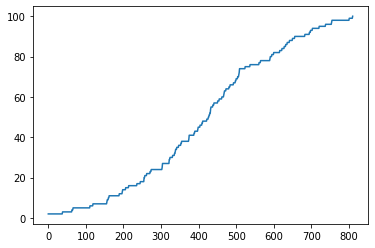

In [90]:
plt.plot(lista_contagiados);
plt.show()

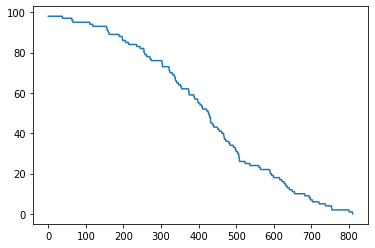

In [91]:
plt.plot(lista_sanos);
plt.show()

Estadistica de los tiempos de contagio

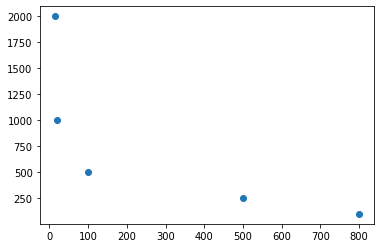

In [92]:
x = [14,20,100,500,800]
y = [2000,1000,500,250,100]

plt.scatter(x,y)
plt.show()

#EJERCICIO 8

Repita el ejercicio 7 modelando el desplazamiento de la población como correlated random walking. En este modelo
suponer que, para cada individuo, la probabilidad de continuar desplazándose en la misma dirección que el paso de tiempo
anterior es 0,4, y equiprobable para las restantes direcciones

In [103]:
NCELDASXFILA = 100
INSTANTES = 5000

In [104]:

def generar_espacio_vacio():
	espacio = []
	for i in range(NCELDASXFILA):
		fila = []
		for j in range(NCELDASXFILA):
			fila.append("_")
		espacio.append(fila)
	return espacio

In [105]:
def obtener_estado(personas):
	espacio = generar_espacio_vacio()
	for v in personas.values():
		espacio[v[0]][v[1]] = v[2]
	return espacio

In [106]:
def imprimir_estado(personas):
	print(obtener_estado(personas))
	print("")

In [107]:
def hay_movimiento(tipo):
	if (tipo == "A"):
		return True
	probMovimiento = random.random()
	if (tipo == "B" and probMovimiento <= 0.5):
		return True
	if (tipo == "C" and probMovimiento <= 0.25):
		return True
	return False

In [108]:

def verificar_rango(i,j,dist):
	if (i + dist < 0 or i + dist >= NCELDASXFILA):
		return False
	if (j + dist < 0 or j + dist >= NCELDASXFILA):
		return False
	return True

In [109]:
def verificar_si_se_infecta(espacio,i,j):
	for dist in range(-3,3):
		if (verificar_rango(i,j,dist) == False):
			continue
		if (espacio[i][j+dist] == "X" or espacio[i+dist][j] == "X"):
			probContagio = random.random()
			if (probContagio <= 0.7):
				return True

	for dist in range(-6,-4):
		if (verificar_rango(i,j,dist) == False):
			continue
		if (espacio[i][j+dist] == "X" or espacio[i+dist][j] == "X"):
			probContagio = random.random()
			if (probContagio <= 0.5):
				return True

	for dist in range(4,6):
		if (verificar_rango(i,j,dist) == False):
			continue
		if (espacio[i][j+dist] == "X" or espacio[i+dist][j] == "X"):
			probContagio = random.random()
			if (probContagio <= 0.5):
				return True
	return False

In [110]:
def random_walking(personas, contagiados,n):
	probMovimiento = {}
	for i in range(n):
		probMovimiento[i] = (0.25,0.25,0.25,0.25)

	sanos = n - contagiados
	lista_contagios_por_t = []
	lista_sanos_por_t = []
	lista_contagios_por_t.append(contagiados)
	lista_sanos_por_t.append(n-contagiados)
	for instante in range(INSTANTES):
		for k,v in personas.items():
			if (hay_movimiento(v[3]) == False):
				continue
			estado = obtener_estado(personas)
			movimiento = random.random()
			if (movimiento <= probMovimiento[k][0]): #sentido del movimiento
				if (v[1]+1 == NCELDASXFILA): #que no se salga de rango
					continue
				if estado[v[0]][v[1]+1] == '_':#que no este ocupada
					personas[k] = (v[0],v[1]+1,v[2],v[3])
					probMovimiento[i] = (0.4,0.2,0.2,0.2)
				
			elif (movimiento <= probMovimiento[k][0] + probMovimiento[k][1]): #sentido del movimiento
				if (v[1]-1 < 0): #que no se salga de rango
					continue
				if estado[v[0]][v[1]-1] == '_':#que no este ocupada
					personas[k] = (v[0],v[1]-1,v[2],v[3])
					probMovimiento[i] = (0.2,0.4,0.2,0.2)

			elif (movimiento <= probMovimiento[k][0] + probMovimiento[k][1] + probMovimiento[k][2]): #sentido del movimiento
				if (v[0]+1 == NCELDASXFILA): #que no se salga de rango
					continue
				if estado[v[0]+1][v[1]] == '_':#que no este ocupada
					personas[k] = (v[0]+1,v[1],v[2],v[3])
					probMovimiento[i] = (0.2,0.2,0.4,0.2)

			else: #sentido del movimiento
				if (v[0]-1 < 0): #que no se salga de rango
					continue
				if estado[v[0]-1][v[1]] == '_':#que no este ocupada
					personas[k] = (v[0]-1,v[1],v[2],v[3])
					probMovimiento[i] = (0.2,0.2,0.2,0.4)


		for i in range(NCELDASXFILA):
			for j in range(NCELDASXFILA):
				if (estado[i][j] == "O" and verificar_si_se_infecta(estado,i,j) == True):
					estado[i][j] = "X"
					contagiados += 1
					sanos -= 1
					for k,v in personas.items():
						if (v[0] == i and v[1] == j):
							personas[k] = (i,j,"X",v[3])
							break

		lista_contagios_por_t.append(contagiados)
		lista_sanos_por_t.append(sanos)
	#	imprimir_estado(personas)
		if (contagiados >= n):	
			return lista_contagios_por_t,lista_sanos_por_t				
	return lista_contagios_por_t,lista_sanos_por_t				


In [111]:
def estado_inicial(n):	
	#Ubico a las N personas de forma aleatoria. El 2% estan infectados.
	#Se decide el "tipo" de persona
	personas = {} #clave: persona. valor: x,y,infectado o no, tipo de persona
	espacio = generar_espacio_vacio()
	contagiados = 0
	for i in range(n):
		x = random.randrange(0,NCELDASXFILA-1)
		y = random.randrange(0,NCELDASXFILA-1)
		while (espacio[x][y] != "_"):
			x = random.randrange(0,NCELDASXFILA-1)
			y = random.randrange(0,NCELDASXFILA-1)

		tipo = ""
		probTipo = random.random()
		if (probTipo <= 0.70):
			tipo = "A"
		elif (probTipo <= 0.95):
			tipo = "B"
		else:
			tipo = "C"

		probInfectado = random.random()
		if (probInfectado <= 0.02):
			personas[i] = (x,y,"X",tipo)
			espacio[x][y]= "X"
			contagiados += 1
		else:
			personas[i] = (x,y,"O",tipo)
			espacio[x][y] = "O"
	return personas, contagiados


Pruebas:

N = 2000

In [127]:
n = 2000 #cantidad de individuos en la poblacion
personas, contagiados = estado_inicial(n)
if (contagiados != 0):
	lista_contagiados, lista_sanos = random_walking(personas,contagiados,n)

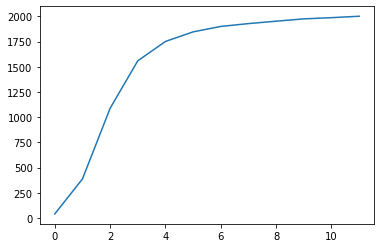

In [128]:
plt.plot(lista_contagiados);
plt.show()

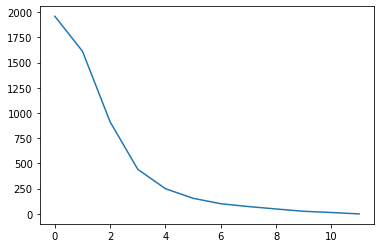

In [129]:
plt.plot(lista_sanos);
plt.show()

N = 1000

In [115]:
n = 1000 #cantidad de individuos en la poblacion
personas, contagiados = estado_inicial(n)
if (contagiados != 0):
	lista_contagiados, lista_sanos = random_walking(personas,contagiados,n)

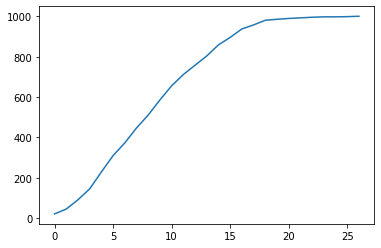

In [116]:
plt.plot(lista_contagiados);
plt.show()

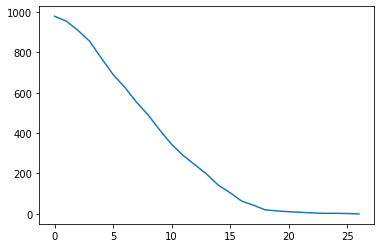

In [117]:
plt.plot(lista_sanos);
plt.show()

N = 500

In [118]:
n = 500 #cantidad de individuos en la poblacion
personas, contagiados = estado_inicial(n)
if (contagiados != 0):
	lista_contagiados, lista_sanos = random_walking(personas,contagiados,n)

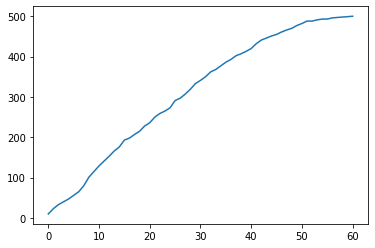

In [119]:
plt.plot(lista_contagiados);
plt.show()

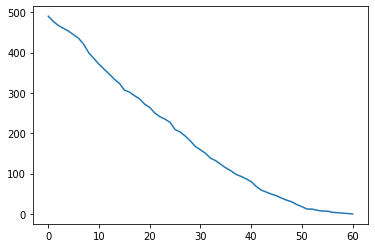

In [120]:
plt.plot(lista_sanos);
plt.show()

N = 250

In [121]:
n = 250 #cantidad de individuos en la poblacion
personas, contagiados = estado_inicial(n)
if (contagiados != 0):
	lista_contagiados, lista_sanos = random_walking(personas,contagiados,n)

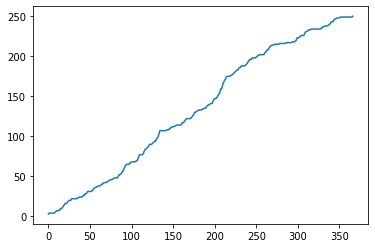

In [122]:
plt.plot(lista_contagiados);
plt.show()

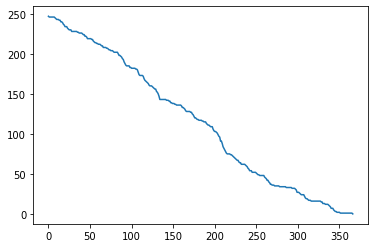

In [123]:
plt.plot(lista_sanos);
plt.show()

N = 100

In [124]:
n = 100 #cantidad de individuos en la poblacion
personas, contagiados = estado_inicial(n)
if (contagiados != 0):
	lista_contagiados, lista_sanos = random_walking(personas,contagiados,n)

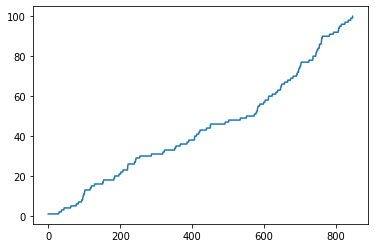

In [125]:
plt.plot(lista_contagiados);
plt.show()

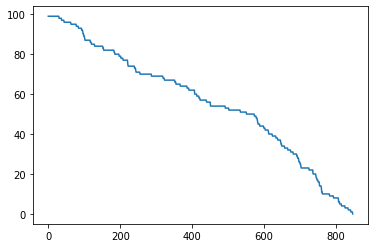

In [126]:
plt.plot(lista_sanos);
plt.show()

Estadisticas de los tiempos de contagio

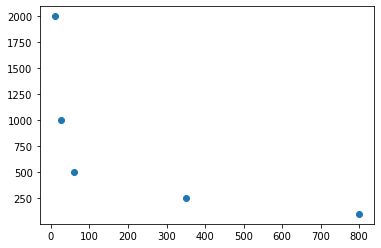

In [130]:
x = [10,25,60,350,800]
y = [2000,1000,500,250,100]

plt.scatter(x,y)
plt.show()

#EJERCICIO 9 (sin inmunidad)

Las personas enfermas, luego de pasar α instantes de tiempo en ese estado, tienen una probabilidad de sanar del β% en
cada uno de los instantes de tiempo siguientes. Considerar escenarios en donde una persona curada puede volver a
contagiarse, y escenarios en donde una persona recuperada no puede contagiarse nuevamente.
Utilizando distintos valores de N, α, β y T, y las situaciones anteriores simular la evolución de la epidemia, a través de 5.000
instantes de tiempo.

In [150]:

NCELDASXFILA = 500
INSTANTES = 1000

In [133]:
def generar_espacio_vacio():
	espacio = []
	for i in range(NCELDASXFILA):
		fila = []
		for j in range(NCELDASXFILA):
			fila.append("_")
		espacio.append(fila)
	return espacio

In [134]:
def obtener_estado(personas):
	espacio = generar_espacio_vacio()
	for v in personas.values():
		espacio[v[0]][v[1]] = v[2]
	return espacio


In [135]:
def imprimir_estado(personas):
	print(obtener_estado(personas))
	print("")


In [136]:
def hay_movimiento(tipo):
	if (tipo == "A"):
		return True
	probMovimiento = random.random()
	if (tipo == "B" and probMovimiento <= 0.5):
		return True
	if (tipo == "C" and probMovimiento <= 0.25):
		return True
	return False

In [137]:
def verificar_rango(i,j,dist):
	if (i + dist < 0 or i + dist >= NCELDASXFILA):
		return False
	if (j + dist < 0 or j + dist >= NCELDASXFILA):
		return False
	return True

In [138]:
def verificar_si_se_infecta(espacio,i,j):
	for dist in range(-3,3):
		if (verificar_rango(i,j,dist) == False):
			continue
		if (espacio[i][j+dist] == "X" or espacio[i+dist][j] == "X"):
			probContagio = random.random()
			if (probContagio <= 0.4):
				return True

	for dist in range(-6,-4):
		if (verificar_rango(i,j,dist) == False):
			continue
		if (espacio[i][j+dist] == "X" or espacio[i+dist][j] == "X"):
			probContagio = random.random()
			if (probContagio <= 0.25):
				return True

	for dist in range(4,6):
		if (verificar_rango(i,j,dist) == False):
			continue
		if (espacio[i][j+dist] == "X" or espacio[i+dist][j] == "X"):
			probContagio = random.random()
			if (probContagio <= 0.25):
				return True
	return False


In [151]:
def random_walking(personas, contagiados,n,ALPHA,BETA):
	dias_enfermedad = {}
	for i in range(n):
		if (personas[i][2] == "X"):
			dias_enfermedad[i] = 1
		else:
			dias_enfermedad[i] = 0

	lista_contagios_por_t = []
	lista_sanos_por_t = []
	lista_contagios_por_t.append(contagiados)
	lista_sanos_por_t.append(n-contagiados)
	for instante in range(INSTANTES):
		for k,v in personas.items():
			if (hay_movimiento(v[3]) == False):
				continue
			estado = obtener_estado(personas)
			movimiento = random.random()
			if (movimiento <= 0.25): #sentido del movimiento
				if (v[1]+1 == NCELDASXFILA): #que no se salga de rango
					continue
				if estado[v[0]][v[1]+1] == '_':#que no este ocupada
					personas[k] = (v[0],v[1]+1,v[2],v[3])
				
			elif (movimiento <= 0.5): #sentido del movimiento
				if (v[1]-1 < 0): #que no se salga de rango
					continue
				if estado[v[0]][v[1]-1] == '_':#que no este ocupada
					personas[k] = (v[0],v[1]-1,v[2],v[3])

			elif (movimiento <= 0.75): #sentido del movimiento
				if (v[0]+1 == NCELDASXFILA): #que no se salga de rango
					continue
				if estado[v[0]+1][v[1]] == '_':#que no este ocupada
					personas[k] = (v[0]+1,v[1],v[2],v[3])

			else: #sentido del movimiento
				if (v[0]-1 < 0): #que no se salga de rango
					continue
				if estado[v[0]-1][v[1]] == '_':#que no este ocupada
					personas[k] = (v[0]-1,v[1],v[2],v[3])


		for i in range(NCELDASXFILA):
			for j in range(NCELDASXFILA):
				if (estado[i][j] == '_'):
					continue
				p = 0
				for k,v in personas.items():
						if (v[0] == i and v[1] == j):
							p = k
							break
				if (estado[i][j] == "O"):
					if (verificar_si_se_infecta(estado,i,j) == True):
						estado[i][j] = "X"
						personas[p] = (i,j,"X",v[3])
						dias_enfermedad[p] = 1
				else:
					dias_enfermedad[p] += 1
					if (dias_enfermedad[p] >= ALPHA):
						probCurarse = random.random()
						if (probCurarse <= BETA): #CURADO
							estado[i][j] = "O"
							personas[p] = (i,j,"O",v[3])
							dias_enfermedad[p] = 0

		contagiados_al_dia = 0
		sanos_al_dia = 0
		for k in dias_enfermedad.keys():
			if (dias_enfermedad[k] == 0):
				sanos_al_dia += 1
			else:
				contagiados_al_dia += 1
		lista_contagios_por_t.append(contagiados_al_dia)
		lista_sanos_por_t.append(sanos_al_dia)
	#	imprimir_estado(personas)	
	return lista_contagios_por_t,lista_sanos_por_t				
			

In [140]:
def estado_inicial(n):	
	#Ubico a las N personas de forma aleatoria. El 2% estan infectados.
	#Se decide el "tipo" de persona
	personas = {} #clave: persona. valor: x,y,infectado o no, tipo de persona
	espacio = generar_espacio_vacio()
	contagiados = 0
	for i in range(n):
		x = random.randrange(0,NCELDASXFILA-1)
		y = random.randrange(0,NCELDASXFILA-1)
		while (espacio[x][y] != "_"):
			x = random.randrange(0,NCELDASXFILA-1)
			y = random.randrange(0,NCELDASXFILA-1)

		tipo = ""
		probTipo = random.random()
		if (probTipo <= 0.70):
			tipo = "A"
		elif (probTipo <= 0.95):
			tipo = "B"
		else:
			tipo = "C"

		probInfectado = random.random()
		if (probInfectado <= 0.02):
			personas[i] = (x,y,"X",tipo)
			espacio[x][y]= "X"
			contagiados += 1
		else:
			personas[i] = (x,y,"O",tipo)
			espacio[x][y] = "O"
	return personas, contagiados


Pruebas con ALPHA = 15
BETA = 0.3 y variando N

In [ ]:
n = 1000 #cantidad de individuos en la poblacion
ALPHA = 15
BETA = 0.3
#Genero el espacio inicial
personas, contagiados = estado_inicial(n)
if (contagiados != 0):
	#LOS PACIENTES RECUPERADOS PUEDEN VOLVER A CONTAGIARSE
	lista_contagiados, lista_sanos = random_walking(personas,contagiados,n,ALPHA,BETA)


In [ ]:
plt.plot(lista_contagiados);
plt.show()

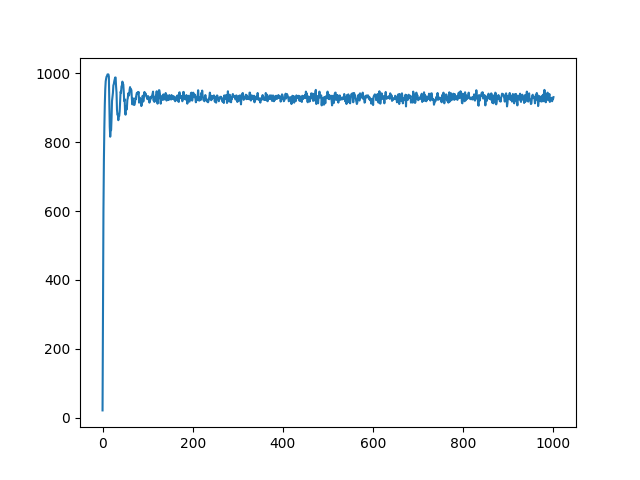

In [ ]:
plt.plot(lista_sanos);
plt.show()

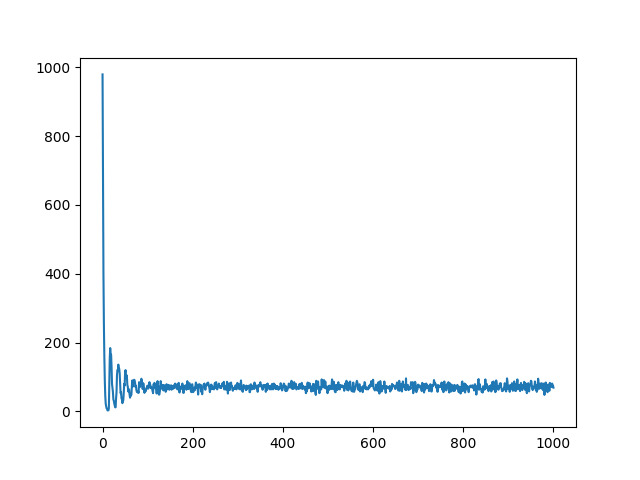

In [ ]:
n = 500 #cantidad de individuos en la poblacion
ALPHA = 15
BETA = 0.3
#Genero el espacio inicial
personas, contagiados = estado_inicial(n)
if (contagiados != 0):
	#LOS PACIENTES RECUPERADOS PUEDEN VOLVER A CONTAGIARSE
	lista_contagiados, lista_sanos = random_walking(personas,contagiados,n,ALPHA,BETA)


In [ ]:
plt.plot(lista_contagiados);
plt.show()

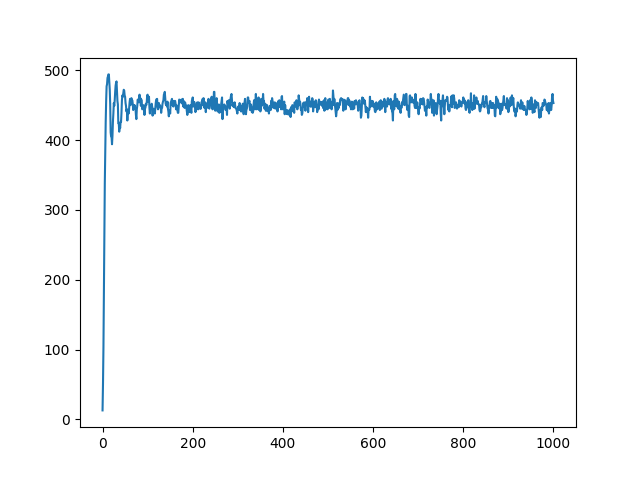

In [ ]:
plt.plot(lista_sanos);
plt.show()

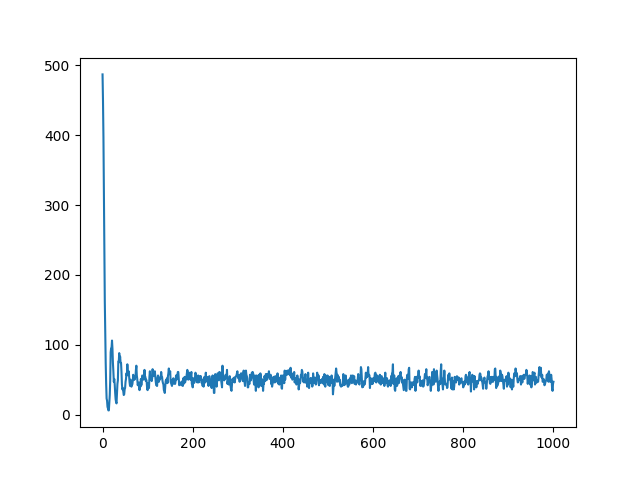

In [ ]:
n = 250 #cantidad de individuos en la poblacion
ALPHA = 15
BETA = 0.3
#Genero el espacio inicial
personas, contagiados = estado_inicial(n)
if (contagiados != 0):
	#LOS PACIENTES RECUPERADOS PUEDEN VOLVER A CONTAGIARSE
	lista_contagiados, lista_sanos = random_walking(personas,contagiados,n,ALPHA,BETA)


In [ ]:
plt.plot(lista_contagiados);
plt.show()

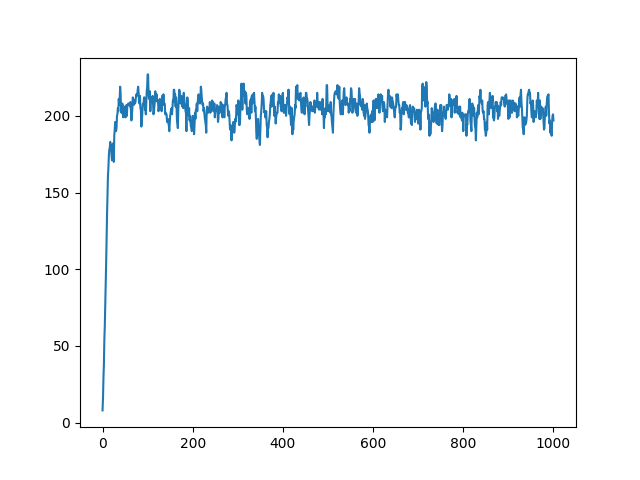

In [ ]:
plt.plot(lista_sanos);
plt.show()

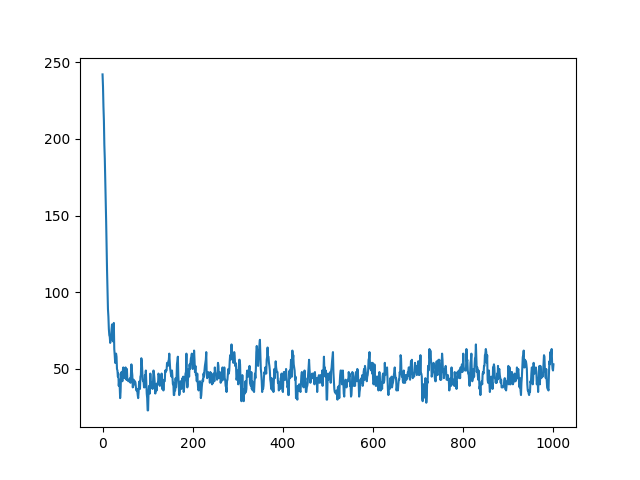

Pruebas con ALPHA = 5
BETA = 0.6 y variando N

In [ ]:
n = 1000 #cantidad de individuos en la poblacion
ALPHA = 5
BETA = 0.6
#Genero el espacio inicial
personas, contagiados = estado_inicial(n)
if (contagiados != 0):
	#LOS PACIENTES RECUPERADOS PUEDEN VOLVER A CONTAGIARSE
	lista_contagiados, lista_sanos = random_walking(personas,contagiados,n,ALPHA,BETA)


In [ ]:
plt.plot(lista_contagiados);
plt.show()

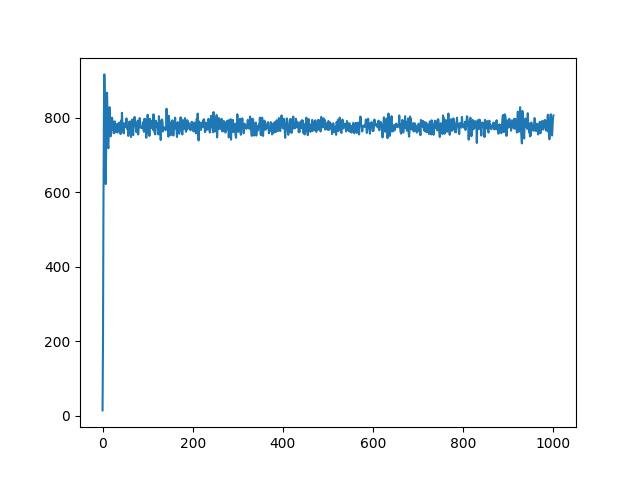

In [ ]:
plt.plot(lista_sanos);
plt.show()

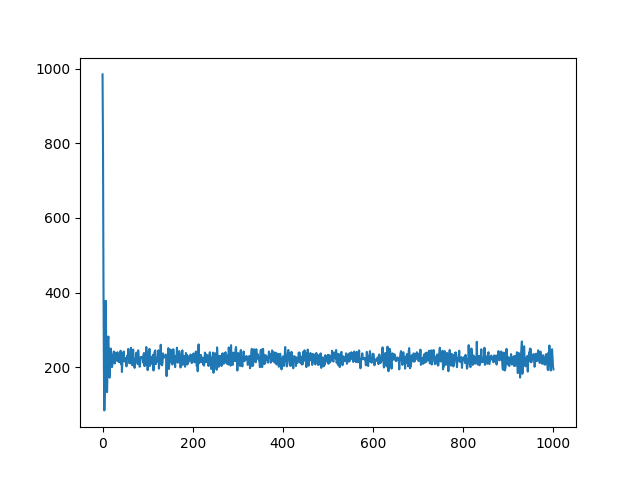

In [ ]:
n = 500 #cantidad de individuos en la poblacion
ALPHA = 5
BETA = 0.6
#Genero el espacio inicial
personas, contagiados = estado_inicial(n)
if (contagiados != 0):
	#LOS PACIENTES RECUPERADOS PUEDEN VOLVER A CONTAGIARSE
	lista_contagiados, lista_sanos = random_walking(personas,contagiados,n,ALPHA,BETA)


In [ ]:
plt.plot(lista_contagiados);
plt.show()

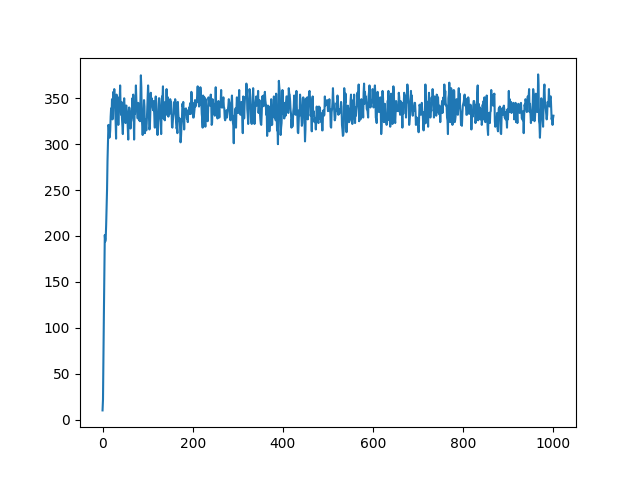

In [ ]:
plt.plot(lista_sanos);
plt.show()

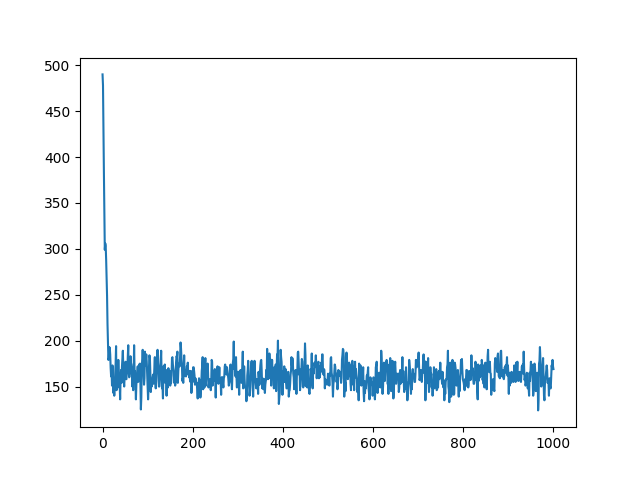

In [ ]:
n = 250 #cantidad de individuos en la poblacion
ALPHA = 5
BETA = 0.6
#Genero el espacio inicial
personas, contagiados = estado_inicial(n)
if (contagiados != 0):
	#LOS PACIENTES RECUPERADOS PUEDEN VOLVER A CONTAGIARSE
	lista_contagiados, lista_sanos = random_walking(personas,contagiados,n,ALPHA,BETA)


In [ ]:
plt.plot(lista_contagiados);
plt.show()

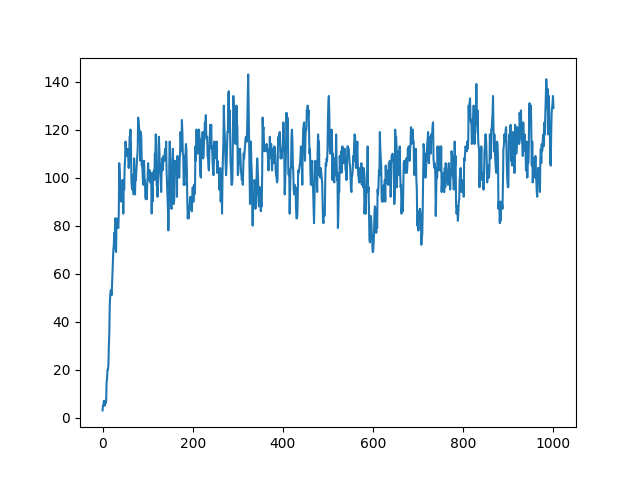

In [ ]:
plt.plot(lista_sanos);
plt.show()

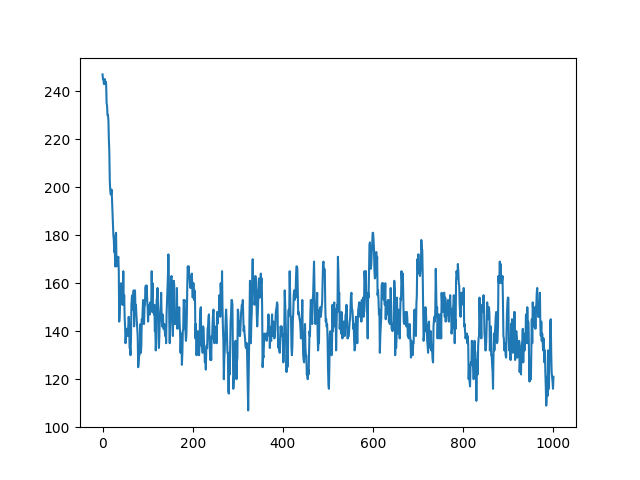